In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X_synthetic = np.linspace(0, 10, 50).reshape(-1, 1)  # Feature: e.g., hours studied
y_synthetic = 2 * X_synthetic + 1 + np.random.normal(0, 1, size=X_synthetic.shape)  # Target: e.g., exam score

print("Synthetic Features (First 5):\n", X_synthetic[:5])
print("Synthetic Targets (First 5):\n", y_synthetic[:5])

Synthetic Features (First 5):
 [[0.        ]
 [0.20408163]
 [0.40816327]
 [0.6122449 ]
 [0.81632653]]
Synthetic Targets (First 5):
 [[1.49671415]
 [1.26989896]
 [2.46401507]
 [3.74751965]
 [2.39849969]]


In [3]:
scaler = StandardScaler()
X_synthetic_normalized = scaler.fit_transform(X_synthetic)

print("Normalized Synthetic Features (First 5):\n", X_synthetic_normalized[:5])

Normalized Synthetic Features (First 5):
 [[-1.69774938]
 [-1.62845348]
 [-1.55915759]
 [-1.4898617 ]
 [-1.4205658 ]]


In [4]:
from sklearn.datasets import fetch_california_housing

# Load California housing dataset
california = fetch_california_housing()

# Select features: MedInc (median income), HouseAge
X_california = california.data[:, [0, 1]]  # First two features
y_california = california.target  # Target: median house value

# Normalize features
X_california_normalized = scaler.fit_transform(X_california)

print("\nCalifornia Housing Features (First 5 Rows):\n", X_california_normalized[:5])
print("\nTarget (Median House Value, First 5):\n", y_california[:5])


California Housing Features (First 5 Rows):
 [[ 2.34476576  0.98214266]
 [ 2.33223796 -0.60701891]
 [ 1.7826994   1.85618152]
 [ 0.93296751  1.85618152]
 [-0.012881    1.85618152]]

Target (Median House Value, First 5):
 [4.526 3.585 3.521 3.413 3.422]


In [5]:
print("Feature Names:", california.feature_names)

Feature Names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [42]:
def predict(X, w, b):
    return np.dot(X, w) + b  # Shape: (n_samples,)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [35]:
w_values = [0.5, 1.5, 2.5]
b_values = [0.0, 0.5, 1.0]

for w, b in zip(w_values, b_values):
    y_pred = predict(X_synthetic_normalized, w, b)
    print(f"For w={w}, b={b} => MSE={mse(y_synthetic, y_pred):.4f}, MAE={mae(y_synthetic, y_pred):.4f}")

For w=0.5, b=0.0 => MSE=144.1575, MAE=10.7745
For w=1.5, b=0.5 => MSE=124.1942, MAE=10.2745
For w=2.5, b=1.0 => MSE=106.7309, MAE=9.7745


In [43]:
def gradient_descent_multi(X, y, learning_rate=0.01, iterations=100):
    m, n = X.shape
    w = np.zeros(n)  # One weight per feature
    b = 0.0
    mse_history = []

    for i in range(iterations):
        y_pred = predict(X, w, b)

        # Ensure shapes match before computing error
        if y_pred.shape != y.shape:
            raise ValueError(f"Shape mismatch: y_pred {y_pred.shape}, y {y.shape}")

        error = y_pred - y

        # Gradients
        dw = (2 / m) * np.dot(X.T, error)
        db = (2 / m) * np.sum(error)

        # Update weights
        w -= learning_rate * dw
        b -= learning_rate * db

        loss = mse(y, y_pred)
        mse_history.append(loss)

        if i % 10 == 0:
            print(f"Iteration {i}: Weights={w}, Bias={b:.4f}, MSE={loss:.4f}")

    return w, b, mse_history

In [44]:
w_opt, b_opt, mse_history = gradient_descent(X_synthetic_normalized, y_synthetic, learning_rate=0.01, iterations=100)

Iteration 0: w=0.1144, b=0.2155, MSE=149.6269
Iteration 10: w=1.1397, b=2.1470, MSE=100.1664
Iteration 20: w=1.9774, b=3.7252, MSE=67.1462
Iteration 30: w=2.6619, b=5.0147, MSE=45.1016
Iteration 40: w=3.2212, b=6.0684, MSE=30.3844
Iteration 50: w=3.6782, b=6.9292, MSE=20.5592
Iteration 60: w=4.0516, b=7.6327, MSE=13.9997
Iteration 70: w=4.3567, b=8.2074, MSE=9.6206
Iteration 80: w=4.6060, b=8.6770, MSE=6.6971
Iteration 90: w=4.8096, b=9.0607, MSE=4.7453


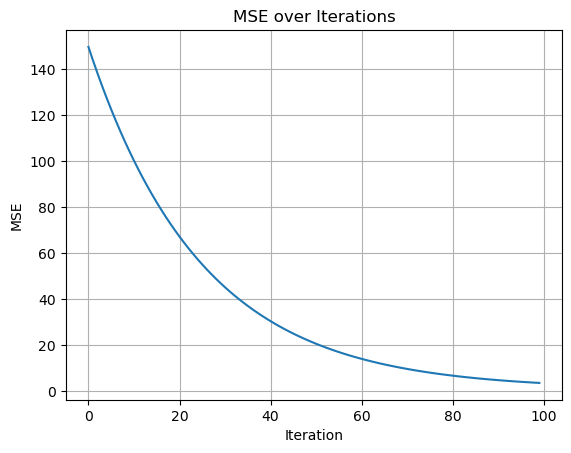

In [45]:
plt.plot(mse_history)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE over Iterations")
plt.grid(True)
plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X_california_normalized, y_california, test_size=0.2, random_state=42
)

In [47]:
w_opt_real, b_opt_real, mse_history_real = gradient_descent_multi(
    X_train, y_train, learning_rate=0.01, iterations=100
)

Iteration 0: Weights=[0.01622783 0.00229856], Bias=0.0414, MSE=5.6297
Iteration 10: Weights=[0.1616843  0.02492971], Bias=0.4128, MSE=3.9793
Iteration 20: Weights=[0.28058538 0.04652732], Bias=0.7161, MSE=2.8768
Iteration 30: Weights=[0.3778425  0.06671256], Bias=0.9638, MSE=2.1401
Iteration 40: Weights=[0.45744718 0.085281  ], Bias=1.1662, MSE=1.6477
Iteration 50: Weights=[0.52264544 0.10215106], Bias=1.3314, MSE=1.3183
Iteration 60: Weights=[0.57607872 0.11732552], Bias=1.4664, MSE=1.0980
Iteration 70: Weights=[0.61989786 0.13086316], Bias=1.5767, MSE=0.9506
Iteration 80: Weights=[0.65585538 0.14285806], Bias=1.6667, MSE=0.8519
Iteration 90: Weights=[0.68538013 0.15342454], Bias=1.7402, MSE=0.7858


In [48]:
y_pred_test = predict(X_test, w_opt_real, b_opt_real)
test_mse = mse(y_test, y_pred_test)
test_mae = mae(y_test, y_pred_test)

print(f"Test MSE: {test_mse:.4f}, Test MAE: {test_mae:.4f}")

Test MSE: 0.7491, Test MAE: 0.6063


# Report